# Stationerity Walkthrough

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df = pd.read_csv("data.csv")
df = df.set_index("Date")
series = pd.Series(data=df.values.flatten(), index=df.index)
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
dtype: int64

### Checking for Stationerity using plots

### Stationary data

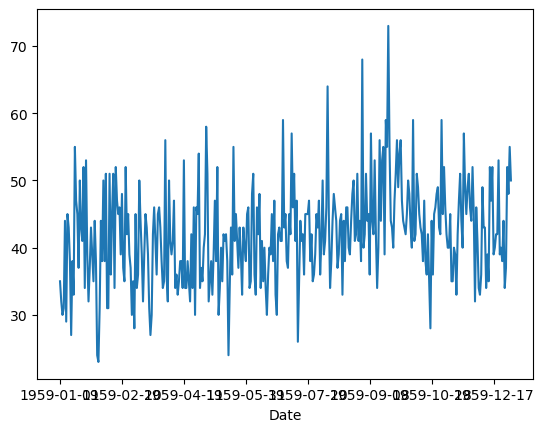

In [3]:
series.plot()
pyplot.show()

In [4]:
df2 = pd.read_csv("international_airline_passengers.csv")

In [5]:
df2 = df2.set_index("Month")
series2 = pd.Series(data=df2.values.flatten(), index=df2.index)
series2.head()

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
dtype: int64

### Non Stationary data

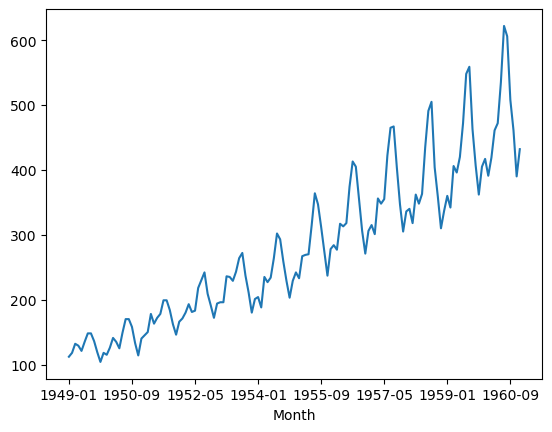

In [7]:
series2.plot()
pyplot.show()

### Checking using summary statistics

split time series into 2 or more partitions and compare the mean and variance of each group

In [8]:
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
dtype: int64

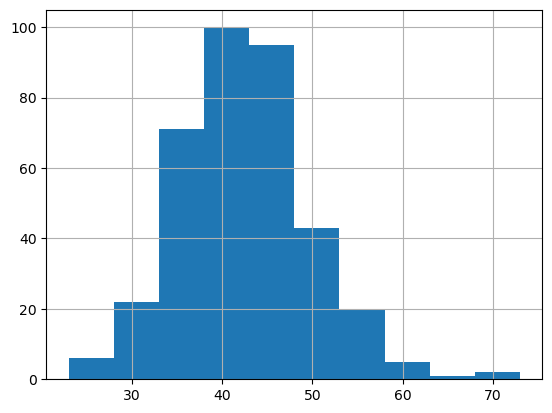

In [9]:
series.hist()
pyplot.show()

In [18]:
# births dataset
X = series.values

split = round(len(X) / 2)

X1, X2 = X[:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print(mean1, mean2)
print(var1, var2)

The mean and variance are similar

In [19]:
# airline dataset
X = series2.values

split = round(len(X) / 2)

X1, X2 = X[:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print(mean1, mean2)
print(var1, var2)

182.90277777777777 377.69444444444446
2244.0877700617284 7367.962191358024


different mean and variance... But the distribution is not normal, so doesn't mean much

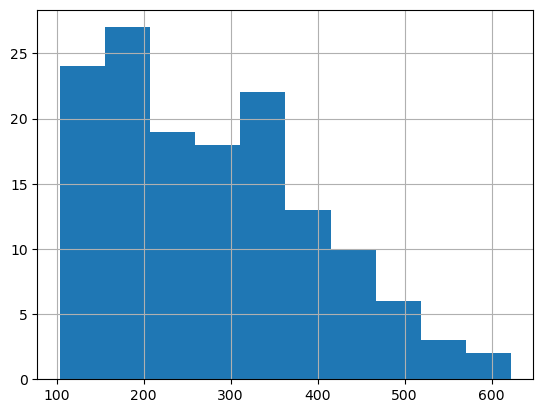

In [20]:
series2.hist()
pyplot.show()

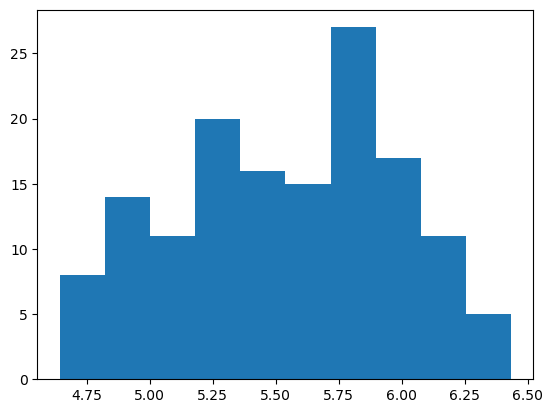

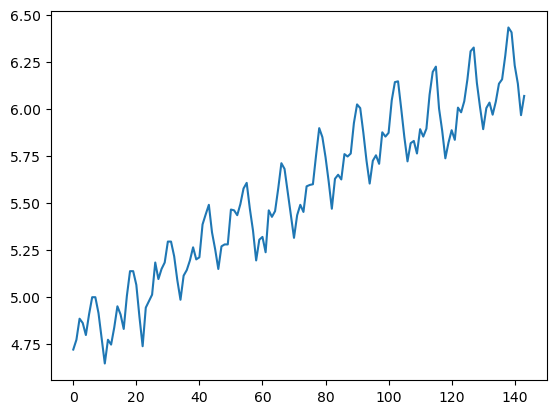

In [23]:
X = series2.values
X = np.log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

after log transform the distrubution is normal we can not calculate mean and variance

In [25]:
X = series2.values
X = np.log(X)
split = round(len(X) / 2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(mean1, mean2)
print(var1, var2)

5.17514614000377 5.909205777059973
0.06837486074542806 0.04926419375638024


values are similar so should be stationary. But from looking at the plot we can see that this is not the case.  
Basically the point of this excercise was to tell us not to trust this method as it can be fooled

### Augmented Dickey Fuller

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Length: 365, dtype: int64

In [28]:
X = series.values
result = adfuller(X)

In [29]:
result

(-4.80829125355976,
 5.243412990149949e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [30]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


> The critical values tell us the thresholds. The adf statistic at these values is the % chance of rejecting the null hypothesis